In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('/kaggle/input/housing/housing.1.csv')

In [3]:
print(data)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                  41          880           129.0   
1        -122.22     37.86                  21         7099          1106.0   
2        -122.24     37.85                  52         1467           190.0   
3        -122.25     37.85                  52         1274           235.0   
4        -122.25     37.85                  52         1627           280.0   
...          ...       ...                 ...          ...             ...   
40191    -121.58     39.83                  16         4591           904.0   
40192    -121.60     39.80                  10         1742           307.0   
40193    -121.62     39.79                  11         3835           727.0   
40194    -121.59     39.82                  12         1958           369.0   
40195    -121.60     39.83                  12         3744           699.0   

       population  households  median_income  media

In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40196 entries, 0 to 40195
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           40196 non-null  float64
 1   latitude            40196 non-null  float64
 2   housing_median_age  40196 non-null  int64  
 3   total_rooms         40196 non-null  int64  
 4   total_bedrooms      39787 non-null  float64
 5   population          40196 non-null  int64  
 6   households          40196 non-null  int64  
 7   median_income       40196 non-null  float64
 8   median_house_value  40196 non-null  int64  
 9   ocean_proximity     40196 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 3.1+ MB
None


In [5]:
print(data.dropna(inplace=True))

None


In [6]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 39787 entries, 0 to 40195
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           39787 non-null  float64
 1   latitude            39787 non-null  float64
 2   housing_median_age  39787 non-null  int64  
 3   total_rooms         39787 non-null  int64  
 4   total_bedrooms      39787 non-null  float64
 5   population          39787 non-null  int64  
 6   households          39787 non-null  int64  
 7   median_income       39787 non-null  float64
 8   median_house_value  39787 non-null  int64  
 9   ocean_proximity     39787 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 3.3+ MB
None


In [7]:
from sklearn.model_selection import train_test_split
X = data.drop(['median_house_value'], axis=1)
y = data['median_house_value']

In [8]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
train_data = X_train.join(y_train)
print(train_data)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
35694    -122.48     37.78                  52         2666           515.0   
35843    -121.23     37.92                  28          590           129.0   
3932     -118.59     34.20                  18          847           185.0   
37194    -121.88     37.26                  13         1893           487.0   
14377    -117.25     32.73                  37         2224           331.0   
...          ...       ...                 ...          ...             ...   
16905    -122.35     37.58                  26          854           246.0   
36288    -122.45     37.70                  16         6457          1336.0   
35792    -121.29     37.99                  45          965           198.0   
37150    -121.90     37.29                  26         1797           244.0   
34511    -117.01     32.75                  26         4038           706.0   

       population  households  median_income ocean_

[[<Axes: title={'center': 'longitude'}>
  <Axes: title={'center': 'latitude'}>
  <Axes: title={'center': 'housing_median_age'}>]
 [<Axes: title={'center': 'total_rooms'}>
  <Axes: title={'center': 'total_bedrooms'}>
  <Axes: title={'center': 'population'}>]
 [<Axes: title={'center': 'households'}>
  <Axes: title={'center': 'median_income'}>
  <Axes: title={'center': 'median_house_value'}>]]


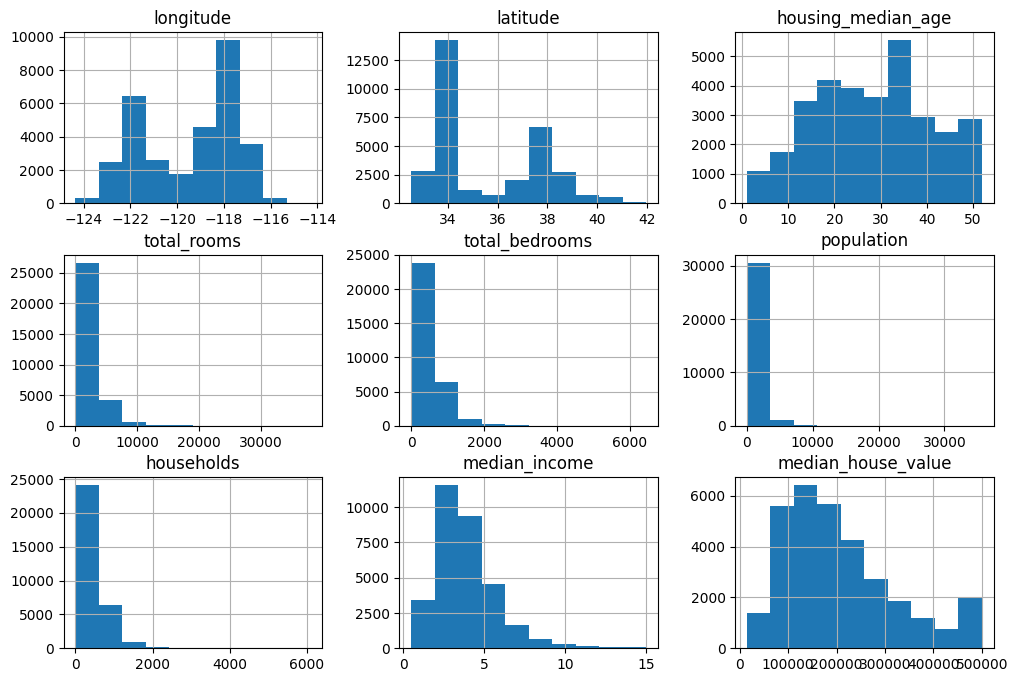

In [9]:
print(train_data.hist(figsize = (12,8)))

[[<Axes: title={'center': 'longitude'}>
  <Axes: title={'center': 'latitude'}>
  <Axes: title={'center': 'housing_median_age'}>]
 [<Axes: title={'center': 'total_rooms'}>
  <Axes: title={'center': 'total_bedrooms'}>
  <Axes: title={'center': 'population'}>]
 [<Axes: title={'center': 'households'}>
  <Axes: title={'center': 'median_income'}>
  <Axes: title={'center': 'median_house_value'}>]]


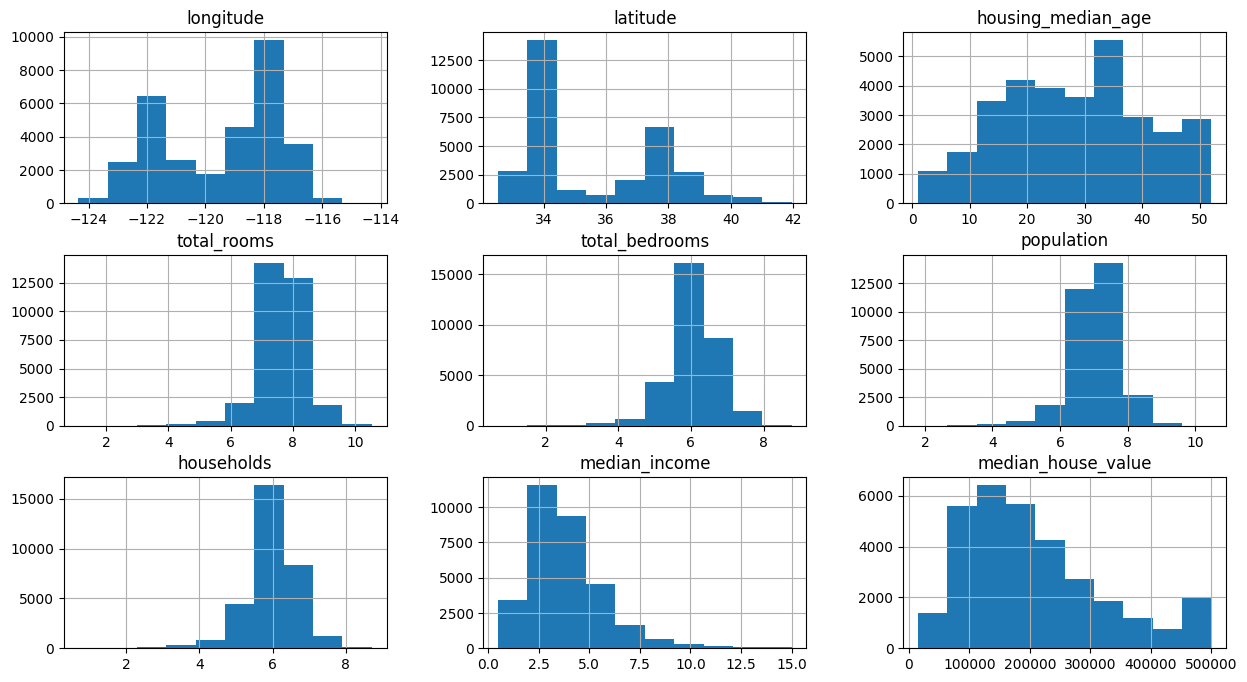

In [10]:
train_data['total_rooms'] = np.log(train_data['total_rooms']+1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms']+1)
train_data['population'] = np.log(train_data['population']+1)
train_data['households'] = np.log(train_data['households']+1)
print(train_data.hist(figsize=(15,8)))

In [11]:
train_data.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     14454
INLAND        10303
NEAR OCEAN     4167
NEAR BAY       2896
ISLAND            9
Name: count, dtype: int64

In [12]:
#makes strings into binary
train_data=train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'],axis=1)
print(train_data)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
35694    -122.48     37.78                  52     7.888710        6.246107   
35843    -121.23     37.92                  28     6.381816        4.867534   
3932     -118.59     34.20                  18     6.742881        5.225747   
37194    -121.88     37.26                  13     7.546446        6.190315   
14377    -117.25     32.73                  37     7.707512        5.805135   
...          ...       ...                 ...          ...             ...   
16905    -122.35     37.58                  26     6.751101        5.509388   
36288    -122.45     37.70                  16     8.773075        7.198184   
35792    -121.29     37.99                  45     6.873164        5.293305   
37150    -121.90     37.29                  26     7.494430        5.501258   
34511    -117.01     32.75                  26     8.303752        6.561031   

       population  households  median_income  media

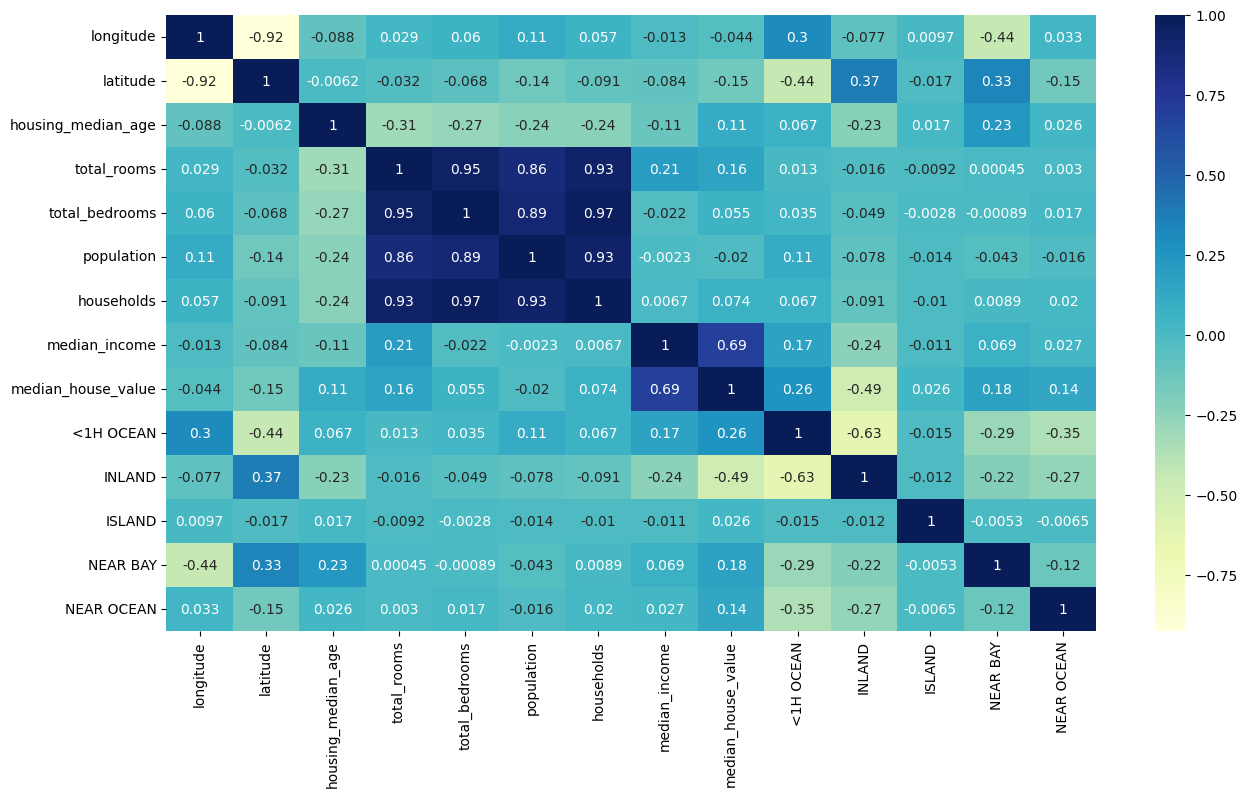

In [13]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap = 'YlGnBu')
plt.show()

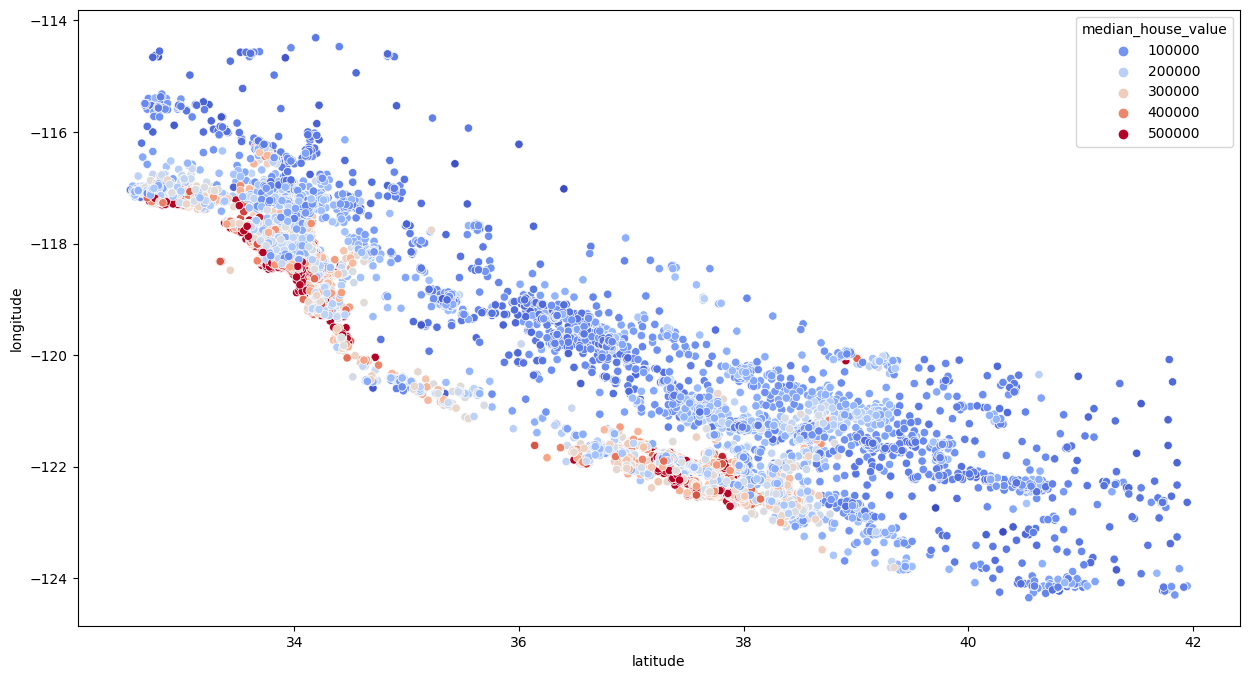

In [14]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='latitude',y='longitude',data=train_data,hue='median_house_value',palette='coolwarm')
plt.show()

In [15]:
train_data['bedroom_ratio'] = train_data['total_bedrooms']/train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms']/train_data['households']

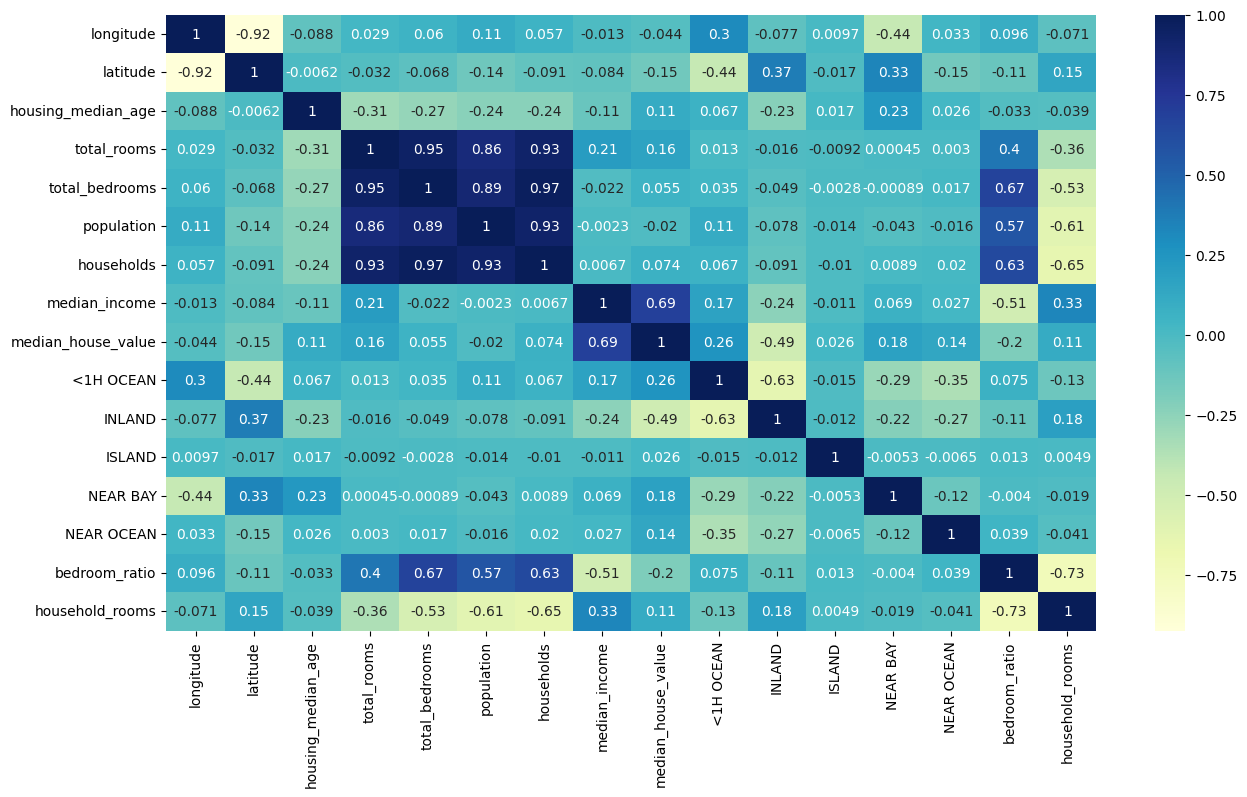

In [16]:
plt.figure(figsize = (15,8))
sns.heatmap(train_data.corr(), annot=True, cmap = 'YlGnBu')
plt.show()

In [17]:
from sklearn.linear_model import LinearRegression
X_train, y_train = train_data.drop(['median_house_value'],axis=1), train_data['median_house_value']
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [18]:
test_data = X_test.join(y_test)
test_data['total_rooms'] = np.log(test_data['total_rooms']+1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms']+1)
test_data['population'] = np.log(test_data['population']+1)
test_data['households'] = np.log(test_data['households']+1)
test_data=test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'],axis=1)
test_data['bedroom_ratio'] = test_data['total_bedrooms']/test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms']/test_data['households']




In [19]:
X_test, y_test = test_data.drop(['median_house_value'],axis=1), test_data['median_house_value']

In [20]:
print('test set accuracy: {:.3f}'.format(reg.score(X_test,y_test)))

test set accuracy: 0.669


In [21]:
print('train set accuracy: {:.3f}'.format(reg.score(X_train, y_train)))

train set accuracy: 0.675


In [22]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()
forest.fit(X_train, y_train)

RandomForestRegressor()

In [23]:
from sklearn.model_selection import GridSearchCV
forest = RandomForestRegressor()
param_grid = {
    'n_estimators': [4,10,30],
    'max_features': [3,4,6,8]
    
}
grid_find = GridSearchCV(forest, param_grid, cv=7, scoring='neg_mean_squared_error',return_train_score=True)
grid_find.fit(X_train,y_train)

GridSearchCV(cv=7, estimator=RandomForestRegressor(),
             param_grid={'max_features': [3, 4, 6, 8],
                         'n_estimators': [4, 10, 30]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [24]:
best_forest = grid_find.best_estimator_

In [25]:
print('test set accuracy: {:.3f}'.format(best_forest.score(X_test,y_test)))

test set accuracy: 0.942


In [26]:
print('train set accuracy: {:.3f}'.format(best_forest.score(X_train,y_train)))

train set accuracy: 0.990
